# Product Analysis

In [ ]:
# to revel answers to most common questions
# product ranking
# product popularity
# rating 
# price elasticity effect

In [ ]:
# importing necessary pakages

In [3]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# path to requred datasets

In [5]:
path_orders = r"C:\Users\Vinayak\Data Analyst - Raw Data (1)\formatted_datasets\orders_formatted.csv"
path_customers = r"C:\Users\Vinayak\Data Analyst - Raw Data (1)\formatted_datasets\customers_formatted.csv"
path_products = r"C:\Users\Vinayak\Data Analyst - Raw Data (1)\formatted_datasets\products_std_fotmatted.csv"
path_order_items = r"C:\Users\Vinayak\Data Analyst - Raw Data (1)\Senior Data Analyst - Raw Data\order_items.csv"
path_cust_rating = r"C:\Users\Vinayak\Data Analyst - Raw Data (1)\formatted_datasets\customer_reviews_formatted.csv"
segmentation_merge = r'C:\Users\Vinayak\Data Analyst - Raw Data (1)\merged_datasets\cust_seg.csv'
product_merge = r'C:\Users\Vinayak\Data Analyst - Raw Data (1)\merged_datasets\prod_merge.csv'

In [ ]:
# defining datasets

In [7]:
df_orders = pd.read_csv(path_orders)
df_customers = pd.read_csv(path_customers)
df_products = pd.read_csv(path_products)
df_order_items = pd.read_csv(path_order_items)
df_cust_rating = pd.read_csv(path_cust_rating)

In [ ]:
# special merged datasets created for analysis
# combining orders + order items + products
# this gives complete detail of a product including name, category, price, toatl purchse value and freqnecy of buying.

In [9]:
df_products_merge = df_orders.merge(df_order_items, on = 'order_id', how ='left' )
df_products_merge.head()
df_final_merge = df_products_merge.merge(df_products, on = 'product_id', how = 'left')
df_final_merge.head()

,order_id,customer_id,order_date,total_amount,status,product_id,quantity,product_name,category,price,price_logged
0,1,101,2023-01-05,250,completed,1,2,Wireless Mouse,Electronics,25,3.258097
1,1,101,2023-01-05,250,completed,3,1,Phone Case,Accessories,15,2.772589
2,2,102,2023-01-07,150,cancelled,4,1,Headphones,Electronics,100,4.615121
3,3,103,2023-01-10,300,completed,6,1,Smartwatch,Electronics,150,5.017280
4,3,103,2023-01-10,300,completed,8,1,Laptop,Electronics,1000,6.908755


In [ ]:
# exporting dataframe into physical csv file

In [11]:
df_final_merge.to_csv(product_merge, index = False)

In [ ]:
# craeting a aggrigated dataframe
# aggrigation includes.
    # total amount (total sell) - addition of all order value
    # freqency - count of order id

In [13]:
df_product_agg = df_final_merge.groupby('product_name').agg({
    'total_amount': 'sum',    # Total spend
    'order_id': 'count',      # Purchase frequency
}).rename(columns={'total_amount': 'Total Sell', 'order_id': 'Purchase Frequency'})
df_product_agg.head()

,Total Sell,Purchase Frequency
product_name,,
Air Conditioner,550,1
Blender,900,1
Chair,850,2
Coffee Maker,250,1
Desk Lamp,320,2


# Ranking

In [ ]:
# Top 5 / bottom 5 products by revenu

In [ ]:
# for this ranking the data is sorted assending and desceding order and then limited to 5 rows

C:\Users\Vinayak\AppData\Local\Temp\ipykernel_13764\1336905015.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(top_valued_products.index, rotation=90)
C:\Users\Vinayak\AppData\Local\Temp\ipykernel_13764\1336905015.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(top_selling_products.index, rotation=90)


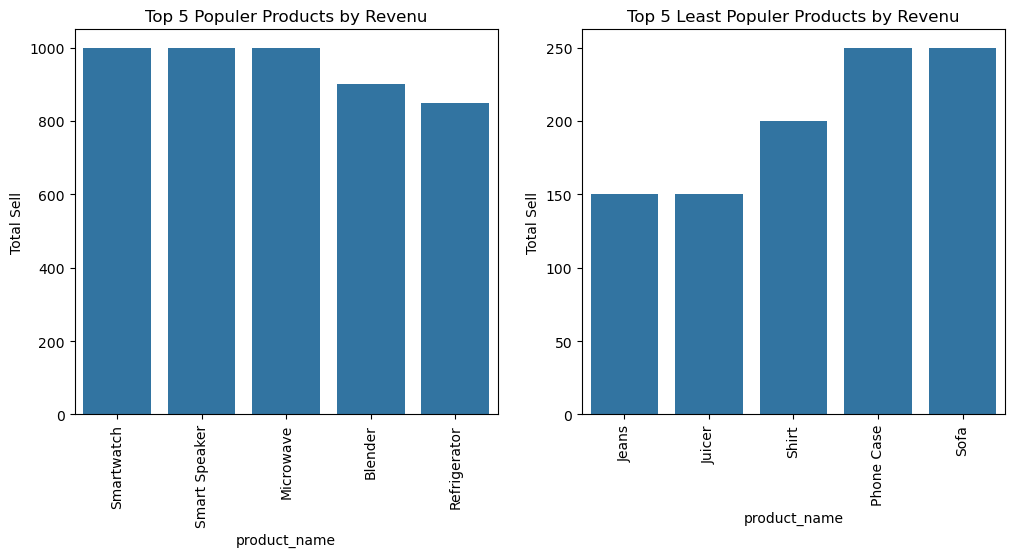

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
top_valued_products = df_product_agg.sort_values(by='Total Sell', ascending=False).head(5)
sns.barplot(x=top_valued_products.index, y=top_valued_products['Total Sell'], ax=axes[0])
axes[0].set_xticklabels(top_valued_products.index, rotation=90)
axes[0].set_title("Top 5 Populer Products by Revenu")
plt.savefig(r"C:\Users\Vinayak\Data Analyst - Raw Data (1)\graphs_and_visuals\atop5_by_revenu.png", dpi=300, bbox_inches="tight")


top_selling_products = df_product_agg.sort_values(by='Total Sell', ascending=True).head(5)
sns.barplot(x=top_selling_products.index, y=top_selling_products['Total Sell'], ax=axes[1])
axes[1].set_xticklabels(top_selling_products.index, rotation=90)
axes[1].set_title("Top 5 Least Populer Products by Revenu")
plt.savefig(r"C:\Users\Vinayak\Data Analyst - Raw Data (1)\graphs_and_visuals\bottom5_by_revenu.png", dpi=300, bbox_inches="tight")

plt.show()

In [ ]:
# Top 5 most - least populer products by order frequency
# this is to check if top values product are wheather frequntly bought 

C:\Users\Vinayak\AppData\Local\Temp\ipykernel_13764\2525279686.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(top_valued_products.index, rotation=90)
C:\Users\Vinayak\AppData\Local\Temp\ipykernel_13764\2525279686.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(top_selling_products.index, rotation=90)


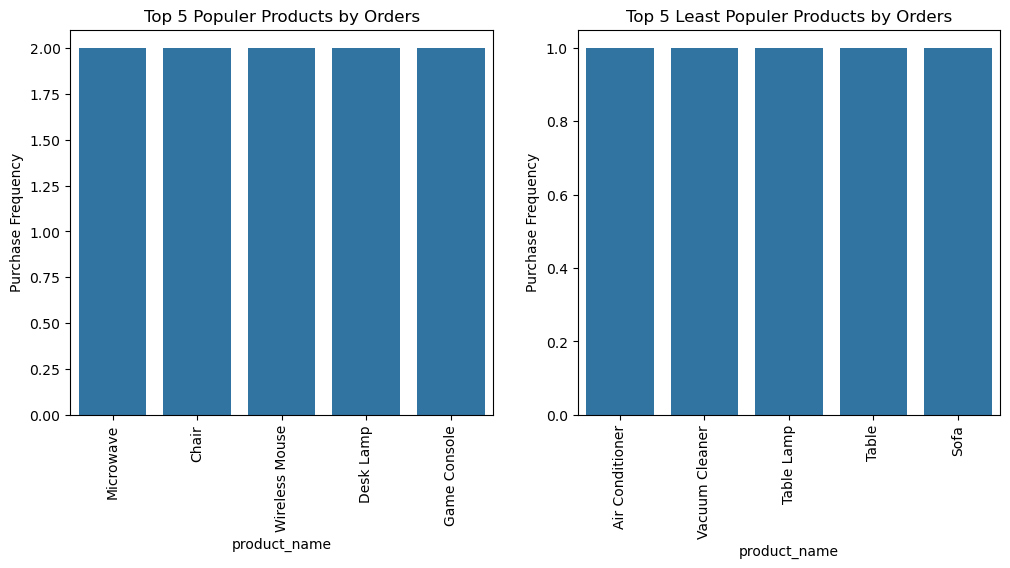

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
top_valued_products = df_product_agg.sort_values(by='Purchase Frequency', ascending=False).head(5)
sns.barplot(x=top_valued_products.index, y=top_valued_products['Purchase Frequency'], ax=axes[0])
axes[0].set_xticklabels(top_valued_products.index, rotation=90)
axes[0].set_title("Top 5 Populer Products by Orders")
plt.savefig(r"C:\Users\Vinayak\Data Analyst - Raw Data (1)\graphs_and_visuals\atop5_by_order.png", dpi=300, bbox_inches="tight")


top_selling_products = df_product_agg.sort_values(by='Purchase Frequency', ascending=True).head(5)
sns.barplot(x=top_selling_products.index, y=top_selling_products['Purchase Frequency'], ax=axes[1])
axes[1].set_xticklabels(top_selling_products.index, rotation=90)
axes[1].set_title("Top 5 Least Populer Products by Orders")
plt.savefig(r"C:\Users\Vinayak\Data Analyst - Raw Data (1)\graphs_and_visuals\atop5_by_order.png", dpi=300, bbox_inches="tight")

plt.show()

# Furthur Analysis

In [ ]:
# this is expanded range for prodcut ranking, to count other products.

C:\Users\Vinayak\AppData\Local\Temp\ipykernel_13764\3321550785.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(top_valued_products.index, rotation=90)
C:\Users\Vinayak\AppData\Local\Temp\ipykernel_13764\3321550785.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(top_selling_products.index, rotation=90)


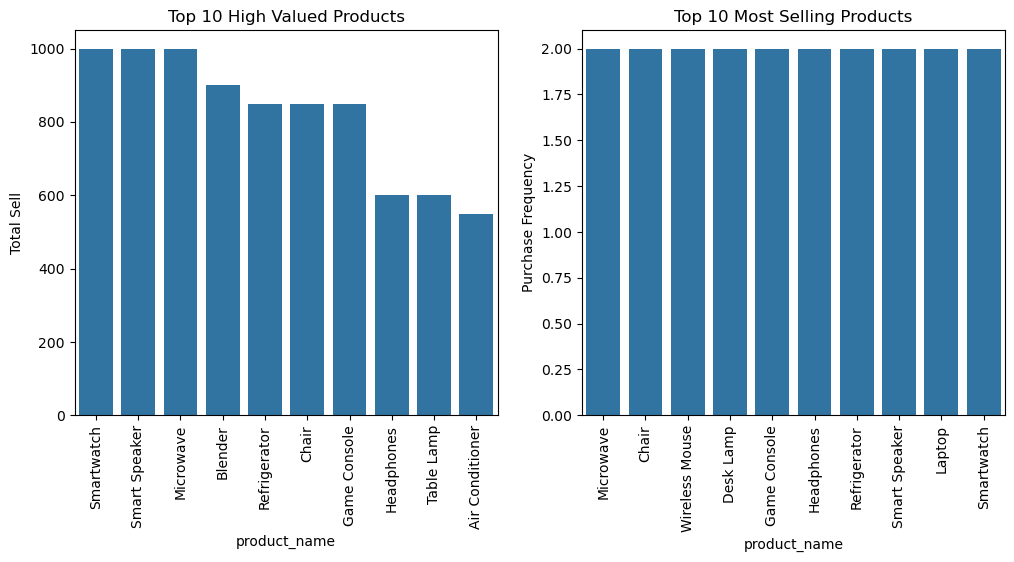

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
top_valued_products = df_product_agg.sort_values(by='Total Sell', ascending=False).head(10)
sns.barplot(x=top_valued_products.index, y=top_valued_products['Total Sell'], ax=axes[0])
axes[0].set_xticklabels(top_valued_products.index, rotation=90)
axes[0].set_title("Top 10 High Valued Products")


top_selling_products = df_product_agg.sort_values(by='Purchase Frequency', ascending=False).head(10)
sns.barplot(x=top_selling_products.index, y=top_selling_products['Purchase Frequency'], ax=axes[1])
axes[1].set_xticklabels(top_selling_products.index, rotation=90)
axes[1].set_title("Top 10 Most Selling Products")

plt.savefig(r"C:\Users\Vinayak\Data Analyst - Raw Data (1)\graphs_and_visuals\top10.png", dpi=300, bbox_inches="tight")

plt.show()

# Price Elasticity Analysis

In [ ]:
# This is kind of analysis done on product price to check effect of product price change on product sale:

In [ ]:
# most of the focus will be on product price and order frequency
# this defines relation betweem them and shows the affect of one on other

In [15]:
df_price_elasticity = df_order_items.merge(df_products, on='product_id', how='left')
df_price_elasticity = df_price_elasticity.groupby(['product_name', 'price']).agg({'quantity': 'sum'}).reset_index()
df_price_elasticity.head()

,product_name,price,quantity
0,Air Conditioner,350,1
1,Blender,80,1
2,Chair,100,2
3,Coffee Maker,70,1
4,Desk Lamp,60,2


In [17]:
df_elasticity_check=df_price_elasticity.groupby("product_name")["price"].count()
df_elasticity_check

product_name
Air Conditioner    1
Blender            1
Chair              1
Coffee Maker       1
Desk Lamp          1
Game Console       1
Headphones         1
Jeans              1
Juicer             1
Keyboard           1
Laptop             1
Laser Printer      1
Microwave          1
Phone Case         1
Projector          1
Refrigerator       1
Shirt              1
Smart Speaker      1
Smart TV           1
Smartphone         1
Smartwatch         1
Sofa               1
Table              1
Table Lamp         1
Vacuum Cleaner     1
Wireless Mouse     1
Wrist Watch        1
Name: price, dtype: int64

In [85]:
# all products have only one price entry, then price elasticity cannot be calculated.
# Price elasticity requires at least two price points per product (e.g., before and after a price change).

# Identify High & Low Selling Products

In [21]:
# top-selling products based on total quantity sold.
df_top_products = df_price_elasticity.groupby("product_name").agg({"quantity": "sum"}).sort_values("quantity", ascending=False)
df_top_products.head(10)  # Top 10 bestsellers

,quantity
product_name,
Smart Speaker,4
Wireless Mouse,3
Laptop,2
Shirt,2
Refrigerator,2
Smartwatch,2
Microwave,2
Table,2
Table Lamp,2


In [88]:
# Analyze Revenue Contribution by Product

In [19]:
# products that generate the highest revenue.
df_price_elasticity["revenue"] = df_price_elasticity["price"] * df_price_elasticity["quantity"]
df_revenue_analysis = df_price_elasticity.groupby("product_name").agg({"revenue": "sum"}).sort_values("revenue", ascending=False)
df_revenue_analysis.head(10)  # Top 10 revenue-generating products

,revenue
product_name,
Laptop,2000
Refrigerator,1600
Game Console,1000
Smart Speaker,800
Sofa,700
Smartphone,700
Smart TV,600
Projector,400
Air Conditioner,350


# Visualize Price vs. Sales

# Interpretation:

# If higher-priced products sell less → price-sensitive customers.

# If high-priced products still sell well → premium products perform well.

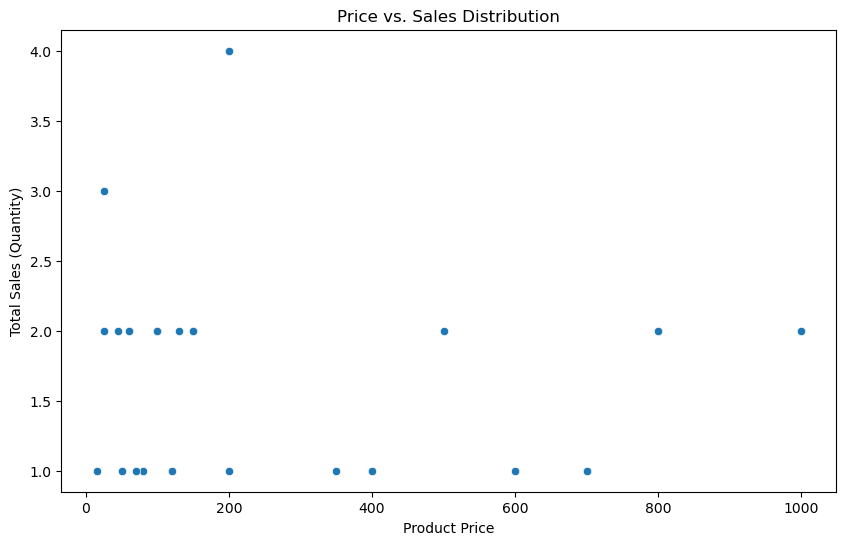

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_price_elasticity["price"], y=df_price_elasticity["quantity"])
plt.xlabel("Product Price")
plt.ylabel("Total Sales (Quantity)")
plt.title("Price vs. Sales Distribution")
plt.savefig(r"C:\Users\Vinayak\Data Analyst - Raw Data (1)\graphs_and_visuals\price_sale.png", dpi=300, bbox_inches="tight")
plt.show()

In [36]:
df_price_elasticity = df_order_items.merge(df_products, on='product_id', how='left')
df_price_elasticity = df_price_elasticity.groupby(['product_id', 'price']).agg({'quantity': 'sum'}).reset_index()
df_top_products = df_price_elasticity.groupby("product_id").agg({"quantity": "sum"}).sort_values("quantity", ascending=False)
df_price_elasticity["revenue"] = df_price_elasticity["price"] * df_price_elasticity["quantity"]
df_revenue_analysis = df_price_elasticity.groupby("product_id").agg({"revenue": "sum"}).sort_values("revenue", ascending=False)
df_revenue_analysis.head()

,revenue
product_id,
8,2000
17,1600
12,1000
13,800
7,700


In [28]:
# top-selling products based on total quantity sold.
df_top_products = df_price_elasticity.groupby("product_name").agg({"quantity": "sum"}).sort_values("quantity", ascending=True).reset_index()
df_top_products.head(10)  # Top 10 bestsellers

,product_name,quantity
0,Air Conditioner,1
1,Sofa,1
2,Smartphone,1
3,Smart TV,1
4,Projector,1
5,Laser Printer,1
6,Keyboard,1
7,Phone Case,1
8,Wrist Watch,1
9,Blender,1


In [ ]:
Positive Correlation (near +1) → Higher price, higher sales (unlikely in most cases).

Negative Correlation (near -1) → Higher price, lower sales (common in price-sensitive markets).

Near Zero (0) → No strong relationship between price & sales.

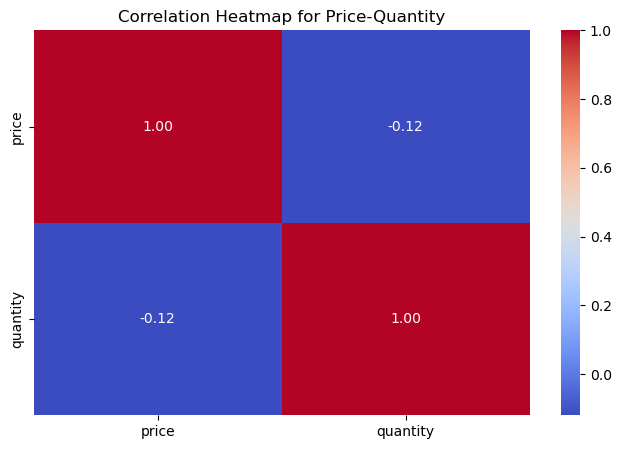

In [38]:
plt.figure(figsize=(8, 5))
sns.heatmap(df_price_elasticity[['price','quantity']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap for Price-Quantity")
plt.show()

In [ ]:
Correlation is -0.12 → Very weak negative correlation.
Price barely affects quantity sold;

# Analyze & Visualize Product Ratings by Category

In [ ]:
# checking if rating of product contributes to low sell of product.
# low rating means negative feedback, which may affect the buy decision of customer

In [ ]:
# merging product review data with products details 

In [33]:
df_rating = df_cust_rating.merge(df_products, on= 'product_id', how='left')
df_rating.head()

,review_id,order_id,product_id,rating,review_text,review_date,product_name,category,price,price_logged
0,1,1,1,4,Good product,2023-01-07,Wireless Mouse,Electronics,25,3.258097
1,2,1,3,5,Excellent quality!,2023-01-07,Phone Case,Accessories,15,2.772589
2,3,2,4,3,Average quality,2023-01-09,Headphones,Electronics,100,4.615121
3,4,3,6,4,Good value for money,2023-01-12,Smartwatch,Electronics,150,5.017280
4,5,3,8,2,Not as expected,2023-01-12,Laptop,Electronics,1000,6.908755


In [ ]:
# Visualize Rating Distribution

In [ ]:
# use of histogram shows the ditribution of data 

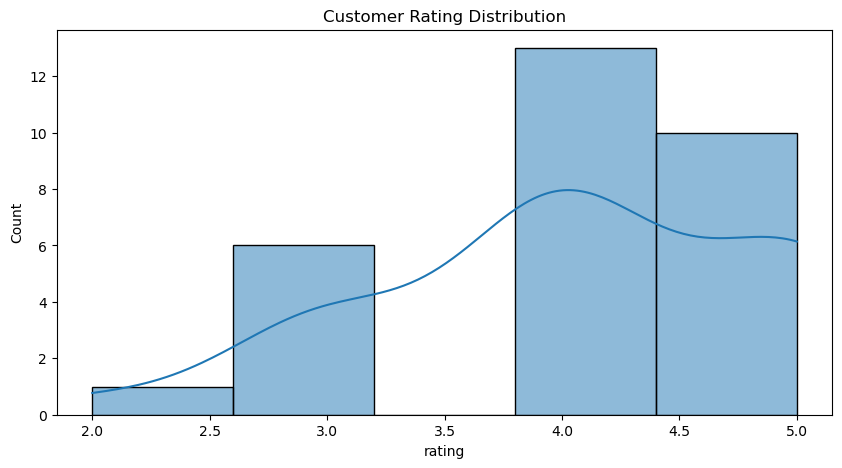

In [35]:
fig, axes = plt.subplots(1, 1, figsize = (10, 5))
sns.histplot(df_rating['rating'], bins = 5, kde = True)
axes.set_title('Customer Rating Distribution')
plt.savefig(r"C:\Users\Vinayak\Data Analyst - Raw Data (1)\graphs_and_visuals\ratingvssales.png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
# left-skewed histogram - Most of the data values tend to cluster towards the right side of the x-axis
# indicates most of the products are top rated, exept for few lower rating

In [ ]:
# visualize product rating by category and its variation

C:\Users\Vinayak\AppData\Local\Temp\ipykernel_10348\3302882574.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="category", y="rating", data=df_rating, palette = 'coolwarm')


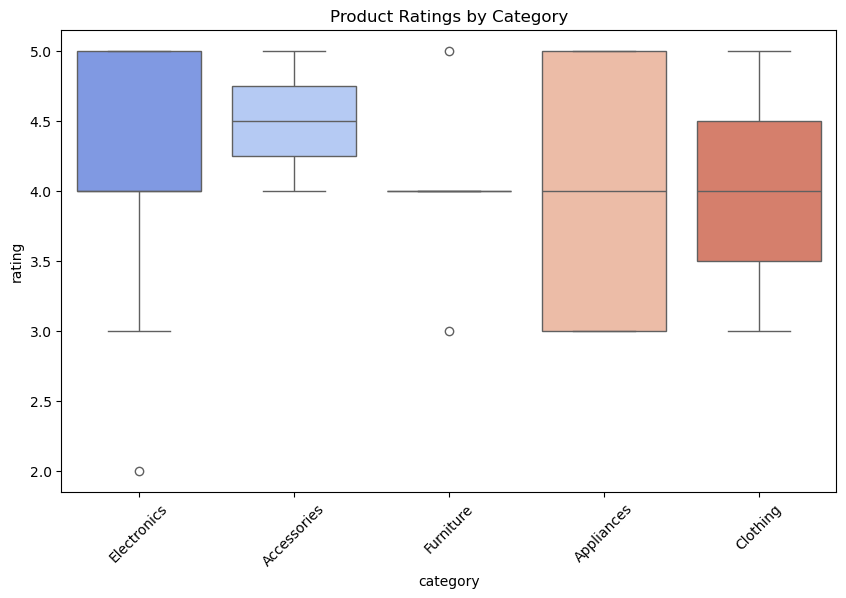

In [37]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="category", y="rating", data=df_rating, palette = 'coolwarm')
plt.xticks(rotation=45)
plt.title("Product Ratings by Category")
plt.savefig(r"C:\Users\Vinayak\Data Analyst - Raw Data (1)\graphs_and_visuals\rating_box_plot.png", dpi=300, bbox_inches="tight")
plt.show()

# Product Rating Analysis

In [ ]:
# Investigate Low-Rated Categories for Improvement
# Goal: Identify why some categories/products have lower ratings.

In [46]:
df_rating.head()

,review_id,order_id,product_id,rating,review_text,review_date,product_name,category,price,price_logged
0,1,1,1,4,Good product,2023-01-07,Wireless Mouse,Electronics,25,3.258097
1,2,1,3,5,Excellent quality!,2023-01-07,Phone Case,Accessories,15,2.772589
2,3,2,4,3,Average quality,2023-01-09,Headphones,Electronics,100,4.615121
3,4,3,6,4,Good value for money,2023-01-12,Smartwatch,Electronics,150,5.017280
4,5,3,8,2,Not as expected,2023-01-12,Laptop,Electronics,1000,6.908755


In [48]:
df_low_rated = df_rating[df_rating['rating'] < 3.5]
df_low_rated

,review_id,order_id,product_id,rating,review_text,review_date,product_name,category,price,price_logged
2,3,2,4,3,Average quality,2023-01-09,Headphones,Electronics,100,4.615121
4,5,3,8,2,Not as expected,2023-01-12,Laptop,Electronics,1000,6.908755
8,9,7,5,3,Could be better,2023-03-18,Desk Lamp,Furniture,60,4.110874
15,16,14,12,3,Okay but expensive,2023-06-11,Game Console,Electronics,500,6.216606
17,18,16,22,3,Not as expected,2023-07-10,Air Conditioner,Appliances,350,5.860786
20,21,19,24,3,Just fine,2023-09-06,Juicer,Appliances,60,4.110874
27,28,26,30,3,Okay,2023-11-14,Jeans,Clothing,50,3.931826


In [50]:
df_low_rated['category'].value_counts()

category
Electronics    3
Appliances     2
Furniture      1
Clothing       1
Name: count, dtype: int64

In [52]:
df_electronics = df_final_merge[df_final_merge['category'] == 'Electronics']
df_electronics

,order_id,customer_id,order_date,total_amount,status,product_id,quantity,product_name,category,price,price_logged
0,1,101,2023-01-05,250,completed,1,2,Wireless Mouse,Electronics,25,3.258097
2,2,102,2023-01-07,150,cancelled,4,1,Headphones,Electronics,100,4.615121
3,3,103,2023-01-10,300,completed,6,1,Smartwatch,Electronics,150,5.017280
4,3,103,2023-01-10,300,completed,8,1,Laptop,Electronics,1000,6.908755
7,5,104,2023-02-20,400,completed,7,1,Smartphone,Electronics,700,6.552508
8,5,104,2023-02-20,400,completed,13,2,Smart Speaker,Electronics,200,5.303305
9,6,105,2023-03-15,350,completed,2,1,Keyboard,Electronics,50,3.931826
14,9,108,2023-04-05,150,completed,12,1,Game Console,Electronics,500,6.216606
18,12,111,2023-05-04,250,cancelled,16,1,Laser Printer,Electronics,200,5.303305
20,14,102,2023-06-10,700,completed,12,1,Game Console,Electronics,500,6.216606


In [ ]:
# aggrigating product total sales, and merging with order frequency

In [47]:
df_cat_agg = df_final_merge.groupby('category').agg({
    'total_amount': 'sum',    # Total spend
    'order_id': 'count',      # Purchase frequency
}).rename(columns={'total_amount': 'Total Sell', 'order_id': 'Purchase Frequency'}).reset_index()
df_cat_agg

,category,Total Sell,Purchase Frequency
0,Accessories,700,2
1,Appliances,4150,9
2,Clothing,350,2
3,Electronics,6270,17
4,Furniture,2520,7


In [ ]:
# checking if rating realy affects the product sale

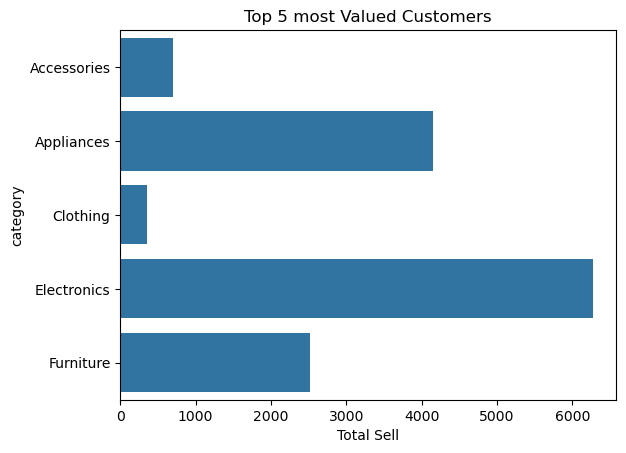

In [53]:
sns.barplot(x=df_cat_agg['Total Sell'], y=df_cat_agg['category'])
#plt.xticks(rotation=90)
plt.title("Top 5 most Valued Customers")
plt.savefig(r"C:\Users\Vinayak\Data Analyst - Raw Data (1)\graphs_and_visuals\category_sale.png", dpi=300, bbox_inches="tight")
plt.show()


In [62]:
df_high_rated = df_rating[df_rating['rating'] > 3.5]
df_high_rated.head()

,review_id,order_id,product_id,rating,review_text,review_date,product_name,category,price,price_logged
0,1,1,1,4,Good product,2023-01-07,Wireless Mouse,Electronics,25,3.258097
1,2,1,3,5,Excellent quality!,2023-01-07,Phone Case,Accessories,15,2.772589
3,4,3,6,4,Good value for money,2023-01-12,Smartwatch,Electronics,150,5.017280
5,6,4,9,4,Very comfortable,2023-02-13,Table,Furniture,150,5.017280
6,7,5,7,5,Loved it,2023-02-21,Smartphone,Electronics,700,6.552508


In [64]:
df_rating['category'].value_counts()

category
Electronics    16
Furniture       5
Appliances      5
Accessories     2
Clothing        2
Name: count, dtype: int64

# Correlate Ratings with Sales & Price

In [59]:
df_merge_sales = df_rating.merge(df_orders, on = 'order_id', how='inner')
df_merge_sales.head()

,review_id,order_id,product_id,rating,review_text,review_date,product_name,category,price,price_logged,customer_id,order_date,total_amount,status
0,1,1,1,4,Good product,2023-01-07,Wireless Mouse,Electronics,25,3.258097,101,2023-01-05,250,completed
1,2,1,3,5,Excellent quality!,2023-01-07,Phone Case,Accessories,15,2.772589,101,2023-01-05,250,completed
2,3,2,4,3,Average quality,2023-01-09,Headphones,Electronics,100,4.615121,102,2023-01-07,150,cancelled
3,4,3,6,4,Good value for money,2023-01-12,Smartwatch,Electronics,150,5.017280,103,2023-01-10,300,completed
4,5,3,8,2,Not as expected,2023-01-12,Laptop,Electronics,1000,6.908755,103,2023-01-10,300,completed


                rating  total_amount
rating        1.000000      0.242451
total_amount  0.242451      1.000000


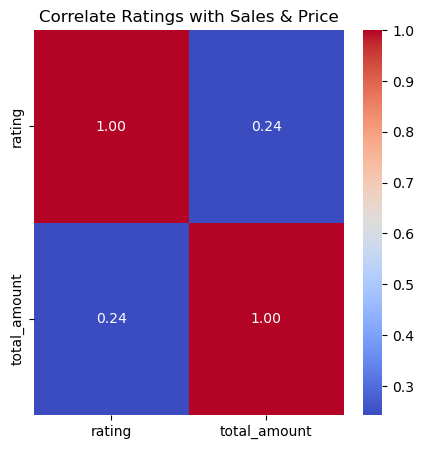

In [61]:
correlation = df_merge_sales[['rating', 'total_amount']].corr()
print(correlation)
plt.figure(figsize=(5, 5))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlate Ratings with Sales & Price")
plt.savefig(r"C:\Users\Vinayak\Data Analyst - Raw Data (1)\graphs_and_visuals\rating_sale_corr.png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
# Correlation is -0.12 → Very weak negative correlation.
# Price barely affects quantity sold

In [ ]:
# to anlyse more checking rating distribution agains sales

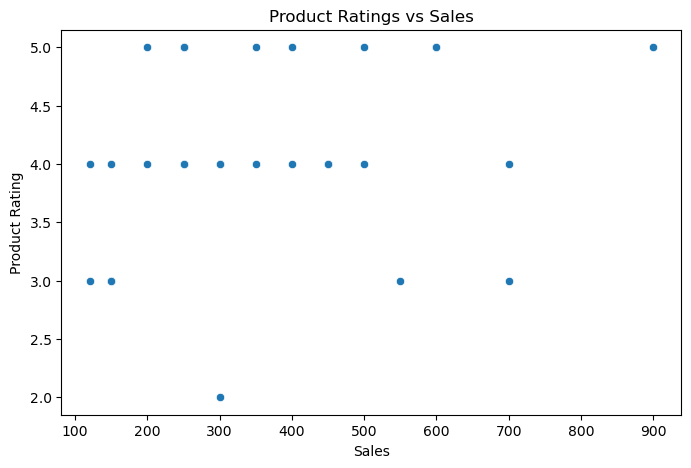

In [63]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="total_amount", y="rating", data=df_merge_sales)
plt.xlabel("Sales")
plt.ylabel("Product Rating")
plt.title("Product Ratings vs Sales")
plt.savefig(r"C:\Users\Vinayak\Data Analyst - Raw Data (1)\graphs_and_visuals\rating_dist.png", dpi=300, bbox_inches="tight")
plt.show()


In [ ]:
# the scatter plot suggests that product rating has some influence on sales, but it's not the only factor.  
# Higher ratings tend to be associated with higher sales, but there's significant variability.  

In [ ]:
Rating = 2: There's only one data point at a rating of 2, with relatively low sales. This could be an outlier or represent a specific product.
Rating = 3: There's a wide range of sales at a rating of 3, from low to relatively high.
Rating = 4: Similar to rating 3, there's a spread of sales values.
Rating = 5: Again, there's a wide range of sales. Some of the highest sales values are observed at this rating, but there are also data points with lower sales.